In [1]:
% matplotlib inline
from obspy.imaging.beachball import beach
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt

In [14]:
noto_hanto = {'coordinates':(136.686000, 37.220667), 'time':'2007-03-25 00:41:57.909996'
              , 'tz':'UTC', 'magnitude':6.9, 'name':'Noto Hanto', 'focal_mech':[34, 40, 108]}
western_tottori = {'coordinates':(133.349, 35.274167), 'time':'2000-10-06 04:30:17.940011'
                   , 'tz':'UTC', 'magnitude':6.7, 'name':'Western Tottori', 'focal_mech':[331, 83, 1]}
sugura_bay = {'coordinates':(138.499333, 34.786167), 'time':'2009-08-10 20:07:05.740017'
              , 'tz':'UTC', 'magnitude':6.5, 'name':'Suruga Bay', 'focal_mech':[88, 51, 63]}
iwaki = {'coordinates':(140.672667, 36.945667), 'time':'2011-04-11 08:16:12.020008'
         , 'tz':'UTC', 'magnitude':6.6, 'name':'Iwaki', 'focal_mech':[139    ,53   ,-75]}
iwate_miyage = {'coordinates':(140.880667, 39.029833), 'time':'2008-06-13 23:43:45.359992'
                , 'tz':'UTC', 'magnitude':6.8, 'name':'Iwate Miyagi', 'focal_mech':[17  ,  42  , 87]}
kumamoto = {'coordinates':(130.763, 32.7545), 'time':'2016-04-14 12:26:00'
            , 'tz':'UTC', 'magnitude':7.0, 'name':'Kumamoto', 'focal_mech':[128  , 71 , -14]}
tohoku = {'coordinates':(142.861000, 38.103500), 'time':'2011-03-11 05:46:18.119983'
          , 'tz':'UTC', 'magnitude':9.0, 'name':'Tohoku-oki'}

eqs =[noto_hanto, western_tottori, sugura_bay, iwaki, iwate_miyage, kumamoto]

In [21]:
def plot_earthquake_on_basemap(eq, m, ax, **kwargs):
    x, y = m(eq['coordinates'][0], eq['coordinates'][1])
    ax.scatter(x, y, s=0.75*np.exp(eq['magnitude']), **kwargs)
    ax.annotate('{year} {name} M{mag}'.format(year=np.datetime64(eq['time']).astype('datetime64[Y]').astype(str)
                                              , mag=str(eq['magnitude']), name=eq['name'])
                , xy=(x, y), xytext=(x, y+0.5), fontsize=15, color='red', fontweight='bold')
    
def plot_beach_ball(earthquake, m, ax, **kwargs):
    lon, lat = earthquake['coordinates']
    x, y = m(lon, lat)
    b = beach(earthquake['focal_mech'], xy=(x, y), width=earthquake['magnitude']/10., **kwargs)
    b.set_zorder(10)
    ax.add_collection(b)


In [4]:
df = import_export.import_catalog(location='/home/max/research/kumamoto/data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])


In [5]:
df = df[df.mag >= 2]

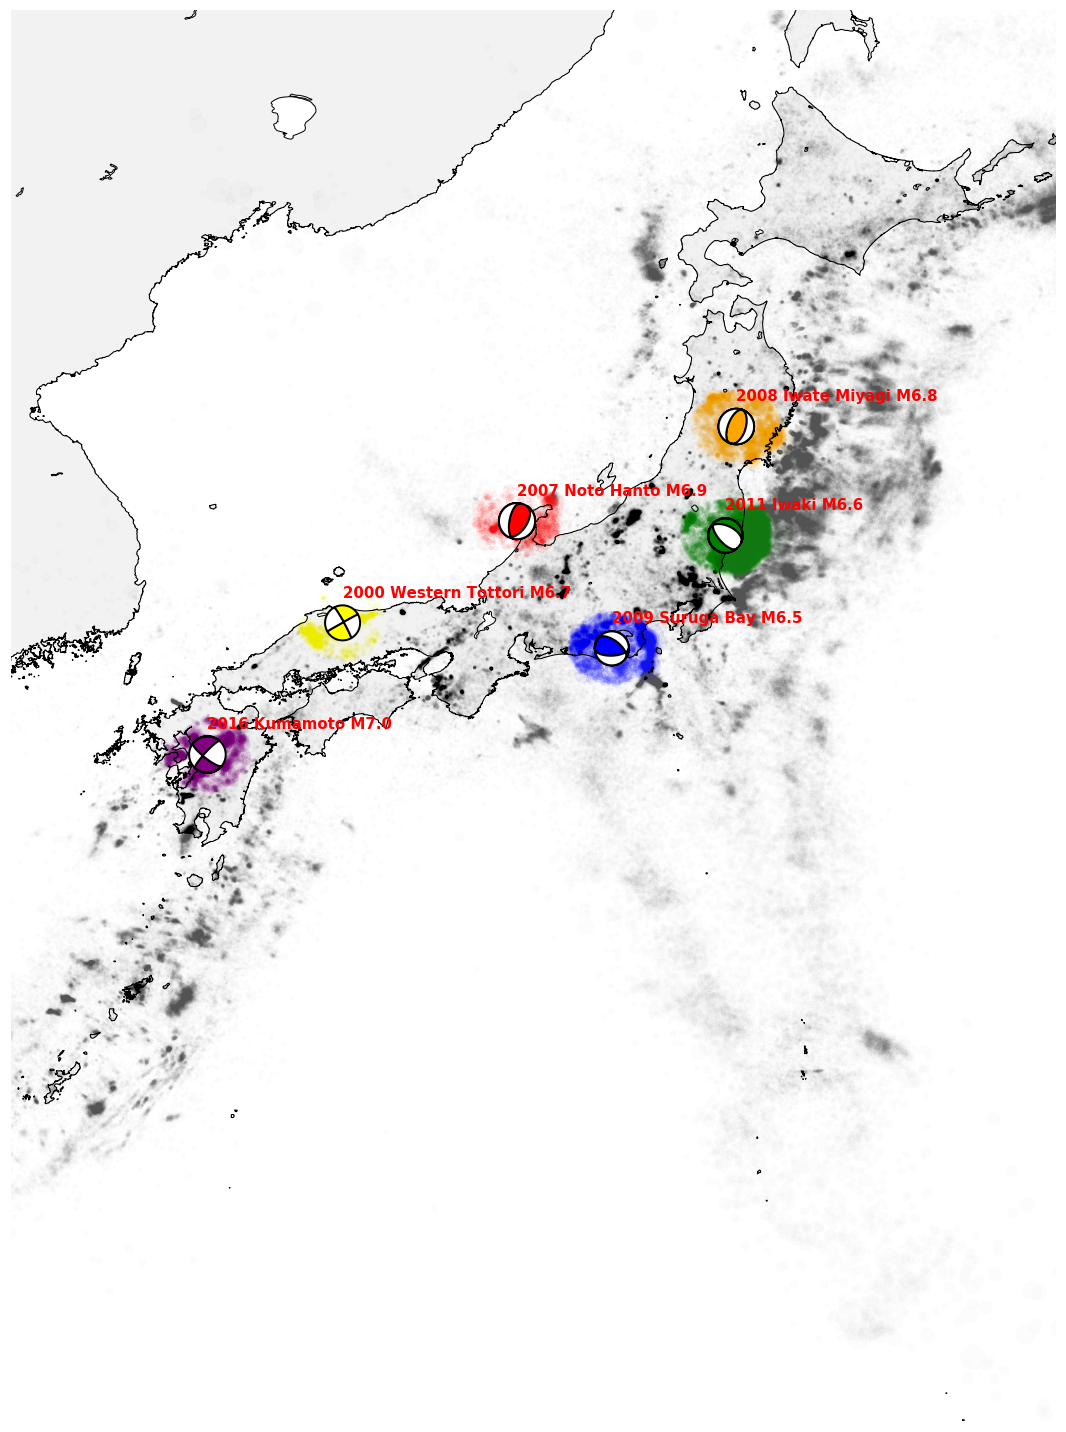

In [30]:
fig, ax = plt.subplots(1, figsize=(20,20))

m = Basemap(llcrnrlon=127
            ,llcrnrlat=20
            ,urcrnrlon=147
            ,urcrnrlat=47
            , epsg=4269
            , ax=ax
            , resolution='f'
            , area_thresh=1)

m.drawcoastlines(linewidth=1)
m.fillcontinents('0.95', zorder=0)

x, y = m(df.lon.values, df.lat.values)

ax.scatter(x, y, s=0.5*np.exp(df.mag), color='black', alpha=0.01)



ax.axis('off')

colors = ['red', 'yellow', 'blue', 'green', 'orange', 'purple']

for eq, color in zip(eqs, colors):
    local_df = polygon_selection.get_node_data(data=df, node=eq['coordinates'], radius=75, m=1)
    x, y = m(local_df.lon.values, local_df.lat.values)
    ax.scatter(x, y, s=np.exp(df.mag), color=color, alpha=0.05)
    plot_earthquake_on_basemap(eq=eq, m=m, ax=ax)
    plot_beach_ball(earthquake=eq, m=m, ax=ax, facecolor=color)

plt.tight_layout()


fig.savefig('japan.png', dpi=500, bbox_inches='tight', transparent=True)

In [ ]:
from datetime import datetime

In [ ]:
np.datetime64(eq['time']).astype('datetime64[Y]').astype(str)

In [ ]:
from obspy.imaging.beachball import beachball


mt = [-1.270, 0.759, 0.513, -0.013, 0.445, -0.332 ]
beachball(mt, size=200, linewidth=2, facecolor='b')

mt2 =  [295    ,39   ,109]
beachball(mt2, size=200, linewidth=2, facecolor='r')

mt3 = [128  , 71 , -14]
beachball(mt3, size=200, linewidth=2, facecolor='g')